# Physics-Informed Neural Network (PINN) code for  the 1D heat equation

![title](image.png)

### Import necessary libraries

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Define the Physics-Informed Neural Network (PINN) model
HeatPINN class defines a neural network with fully connected layers and Tanh activations. It predicts the temperature u(x, t) at a given position x and time t.

In [4]:
class HeatPINN(nn.Module):
    """
    A neural network model for solving the 1D heat equation using the Physics-Informed Neural Network (PINN) approach.
    
    Attributes:
        model (nn.Sequential): The neural network architecture for the PINN.
    """
    def __init__(self):
        super(HeatPINN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )

    def forward(self, x, t):
        """
        Forward pass through the neural network.
        
        Args:
            x (torch.Tensor): The spatial coordinate tensor.
            t (torch.Tensor): The time coordinate tensor.
            
        Returns:
            torch.Tensor: Predicted temperature `u(x, t)` tensor.
        """
        inputs = torch.cat((x, t), dim=1)
        u = self.model(inputs)
        return u


### Define the PDE loss function
• The heat_loss_fn function calculates the residual of the heat equation by taking derivatives with respect to space x and time t.
    
• Automatic Differentiation - PyTorch’s autograd is used to compute these derivatives.
    
•  The loss function penalizes solutions that don’t satisfy the heat equation, guiding the model to learn physically valid solutions.

In [5]:
def heat_loss_fn(model, x, t, alpha):
    """
    Compute the physics-informed loss based on the heat equation residual.
    
    Args:
        model (HeatPINN): The PINN model.
        x (torch.Tensor): The spatial coordinate tensor.
        t (torch.Tensor): The time coordinate tensor.
        alpha (float): The thermal diffusivity constant.
    
    Returns:
        torch.Tensor: Mean squared loss of the heat equation residual.
    """
    u = model(x, t)
    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)[0]
    u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    residual = u_t - alpha * u_xx
    return torch.mean(residual ** 2)


### Training function
• The train_pinn function performs gradient descent to minimize the physics-informed loss. The loss at each epoch is printed every 100 epochs to monitor progress.

• Loss values are recorded for visualization.

In [6]:
def train_pinn(model, optimizer, x_train, t_train, alpha, epochs=1000):
    """
    Train the PINN model to solve the heat equation.
    
    Args:
        model (HeatPINN): Instance of the PINN model.
        optimizer (torch.optim.Optimizer): Optimizer to update the model weights.
        x_train (torch.Tensor): Spatial training coordinates.
        t_train (torch.Tensor): Temporal training coordinates.
        alpha (float): Thermal diffusivity constant.
        epochs (int): Number of training epochs.
        
    Returns:
        list: Training losses recorded at each epoch.
    """
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = heat_loss_fn(model, x_train, t_train, alpha)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
    return losses

### Visualization function for results

In [7]:
def plot_results(x_train, t_train, u_pred, losses):

    # Plot training loss
    plt.figure(figsize=(10, 4))
    plt.plot(losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.legend()
    plt.show()

    # Plot the predicted temperature solution u(x, t)
    plt.figure(figsize=(10, 4))
    plt.scatter(t_train.detach().numpy(), u_pred.detach().numpy(), color='blue', label="Predicted u(x, t)")
    plt.xlabel("Time (t)")
    plt.ylabel("Temperature u(x, t)")
    plt.title("Predicted Temperature over Time")
    plt.legend()
    plt.show()

### Generate synthetic data

In [8]:
alpha = 0.1  # thermal diffusivity
x_train = torch.rand(100, 1, requires_grad=True)
t_train = torch.rand(100, 1, requires_grad=True)

### Initialize model and optimizer

In [9]:
model = HeatPINN()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

### Train the model

In [10]:
losses = train_pinn(model, optimizer, x_train, t_train, alpha)

Epoch 0, Loss: 0.005798002704977989
Epoch 100, Loss: 1.1874953088408802e-05
Epoch 200, Loss: 1.7110725138991256e-06
Epoch 300, Loss: 4.784949396707816e-07
Epoch 400, Loss: 2.34480353356048e-07
Epoch 500, Loss: 1.433082275070774e-07
Epoch 600, Loss: 1.0755463364375828e-07
Epoch 700, Loss: 9.138753398474364e-08
Epoch 800, Loss: 8.168905196725973e-08
Epoch 900, Loss: 7.424895898111572e-08


### Get predictions for visualization

In [11]:
u_pred = model(x_train, t_train)

### Plot the results

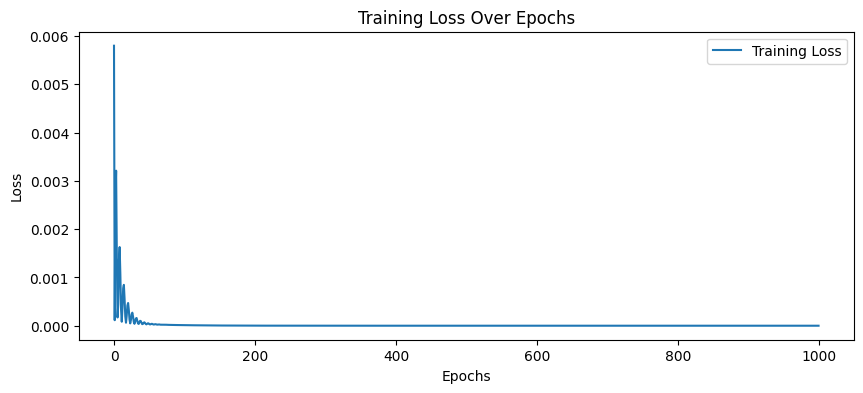

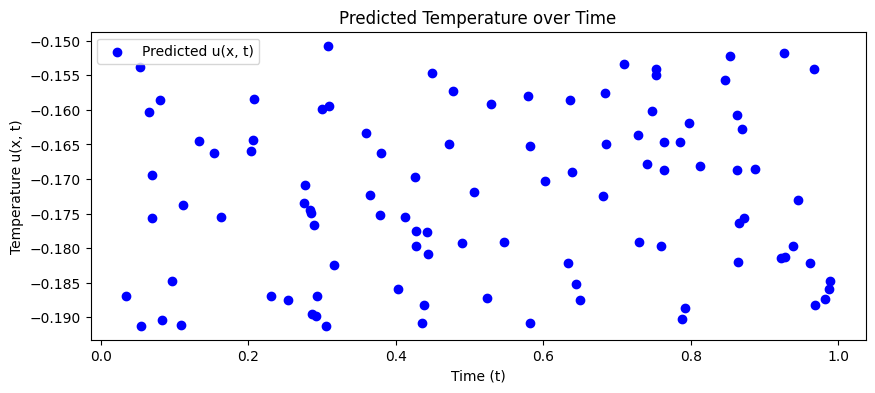

In [12]:
plot_results(x_train, t_train, u_pred, losses)